In [1]:
# import
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import warnings
import streamlit as st
from keras.layers import Dense, Activation
from keras.models import Sequential
from tensorflow import keras
from sklearn.cluster import KMeans
# folium
import folium
import folium.plugins as plugins
from streamlit_folium import folium_static

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'


# Style
sns.set_style(style = 'darkgrid')









# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 15}

# plt.rc('font', **font)


# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [41]:
# import pandas as pd
# import glob
# import os

# files = os.path.join("/Users/hitomihoshino/Documents/DS/salesforce/japan","scrape_en*.csv")
# files = glob.glob(files)

# df = pd.concat(map(pd.read_csv, files), ignore_index=True)

# df.to_csv('review_en.csv')

df = pd.read_csv('review_en.csv')

In [3]:
df.drop_duplicates(inplace = True)

In [42]:
df.isna().sum()

Unnamed: 0            0
タイトル                101
タイトルリンク             101
typography-hy         0
point               198
w-100                 0
口コミ投稿日                0
text-center           0
report                0
report1               0
Unnamed: 0.1        361
Unnamed: 0.1.1      361
Unnamed: 0.1.1.1    461
dtype: int64

In [43]:
df.columns

Index(['Unnamed: 0', 'タイトル', 'タイトルリンク', 'typography-hy', 'point', 'w-100',
       '口コミ投稿日', 'text-center', 'report', 'report1', 'Unnamed: 0.1',
       'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1'],
      dtype='object')

In [44]:
df.drop(['Unnamed: 0','タイトルリンク', 'report', 'report1', 'Unnamed: 0.1',
       'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'text-center'], axis = 1, inplace = True)

In [45]:
df.shape

(686, 5)

In [46]:
df.columns

Index(['タイトル', 'typography-hy', 'point', 'w-100', '口コミ投稿日'], dtype='object')

In [47]:
df.head(1)

,タイトル,typography-hy,point,w-100,口コミ投稿日
0,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,働き方（勤務時間・休日休暇・制度）,4.7,勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...,2022年03月 6日


In [48]:
df.rename(columns = {'タイトル': 'reviewer_info', 
                     'typography-hy': 'title', 
                     'point' : 'rating', 
                     'w-100': 'review', 
                     '口コミ投稿日': 'date',
                    }, inplace = True)

In [49]:
df.dtypes

reviewer_info     object
title             object
rating           float64
review            object
date              object
dtype: object

In [50]:
df.isna().sum()

reviewer_info    101
title              0
rating           198
review             0
date               0
dtype: int64

In [51]:
df.head(1)

,reviewer_info,title,rating,review,date
0,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,働き方（勤務時間・休日休暇・制度）,4.7,勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...,2022年03月 6日


### Filling NaN values in ratting col with the mean of around 4.5

In [52]:
df['rating'].unique()
df['rating'].replace(np.nan, 4.5, inplace = True)

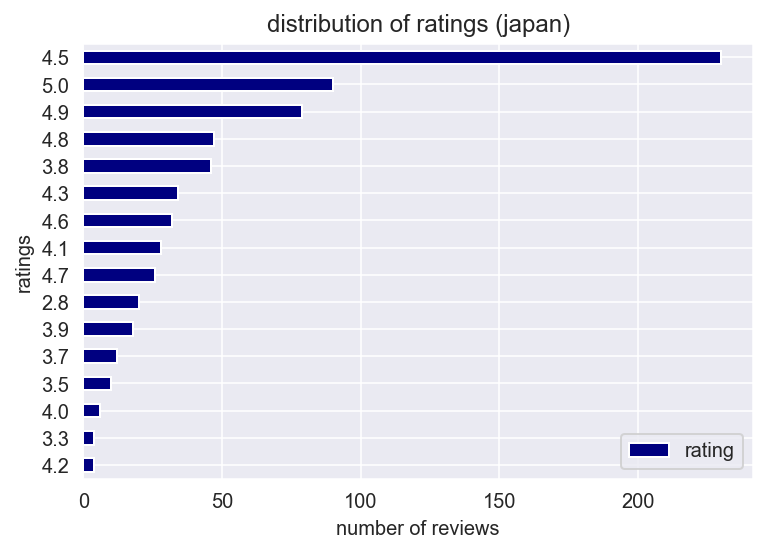

In [53]:
plt.title('distribution of ratings (japan)')

ax = df['rating'].value_counts(ascending=True).plot(kind = 'barh', color = 'Navy')
ax.set_xlabel("number of reviews")
ax.set_ylabel("ratings")
ax.legend()

In [54]:
# df['rating'] = df['rating'].replace([2.8],2)
# df['rating'] = df['rating'].replace([3.8, 3.5, 3.7, 3.3, 3.9],3)
# df['rating'] = df['rating'].replace([4.7, 4.9, 4.5, 4.6, 4.8, 4.1, 4.3, 4., 4.2],4)

In [55]:
df.rating.unique()

array([4.7, 5. , 4.9, 2.8, 3.8, 4.5, 4.6, 4.8, 3.5, 4.1, 4.3, 4. , 3.9,
       3.7, 4.2, 3.3])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_info  585 non-null    object 
 1   title          686 non-null    object 
 2   rating         686 non-null    float64
 3   review         686 non-null    object 
 4   date           686 non-null    object 
dtypes: float64(1), object(4)
memory usage: 26.9+ KB


In [57]:
df['title'].unique()

array(['働き方（勤務時間・休日休暇・制度）', '年収・給与', '企業カルチャー・組織体制', '福利厚生・オフィス環境',
       '事業展望・強み・弱み', '入社前とのギャップ', '女性の働きやすさ', '成長・働きがい'], dtype=object)

In [58]:
# df['column name'] = df['column name'].replace(['old value'],'new value')
df['title'] = df['title'].replace(['働き方（勤務時間・休日休暇・制度）'], 'Work style (working hours/holidays/systems)')
df['title'] = df['title'].replace(['年収・給与'], 'Annual salary/salary')
df['title'] = df['title'].replace(['企業カルチャー・組織体制'], 'Corporate culture/organizational system')
df['title'] = df['title'].replace(['福利厚生・オフィス環境'], 'Benefits/office environment')
df['title'] = df['title'].replace(['事業展望・強み・弱み'], 'Business prospects/strengths/weaknesses')
df['title'] = df['title'].replace(['入社前とのギャップ'], 'Gap before joining the company')
df['title'] = df['title'].replace(['女性の働きやすさ'], 'working for women')
df['title'] = df['title'].replace(['成長・働きがい'], 'Growth/motivation')

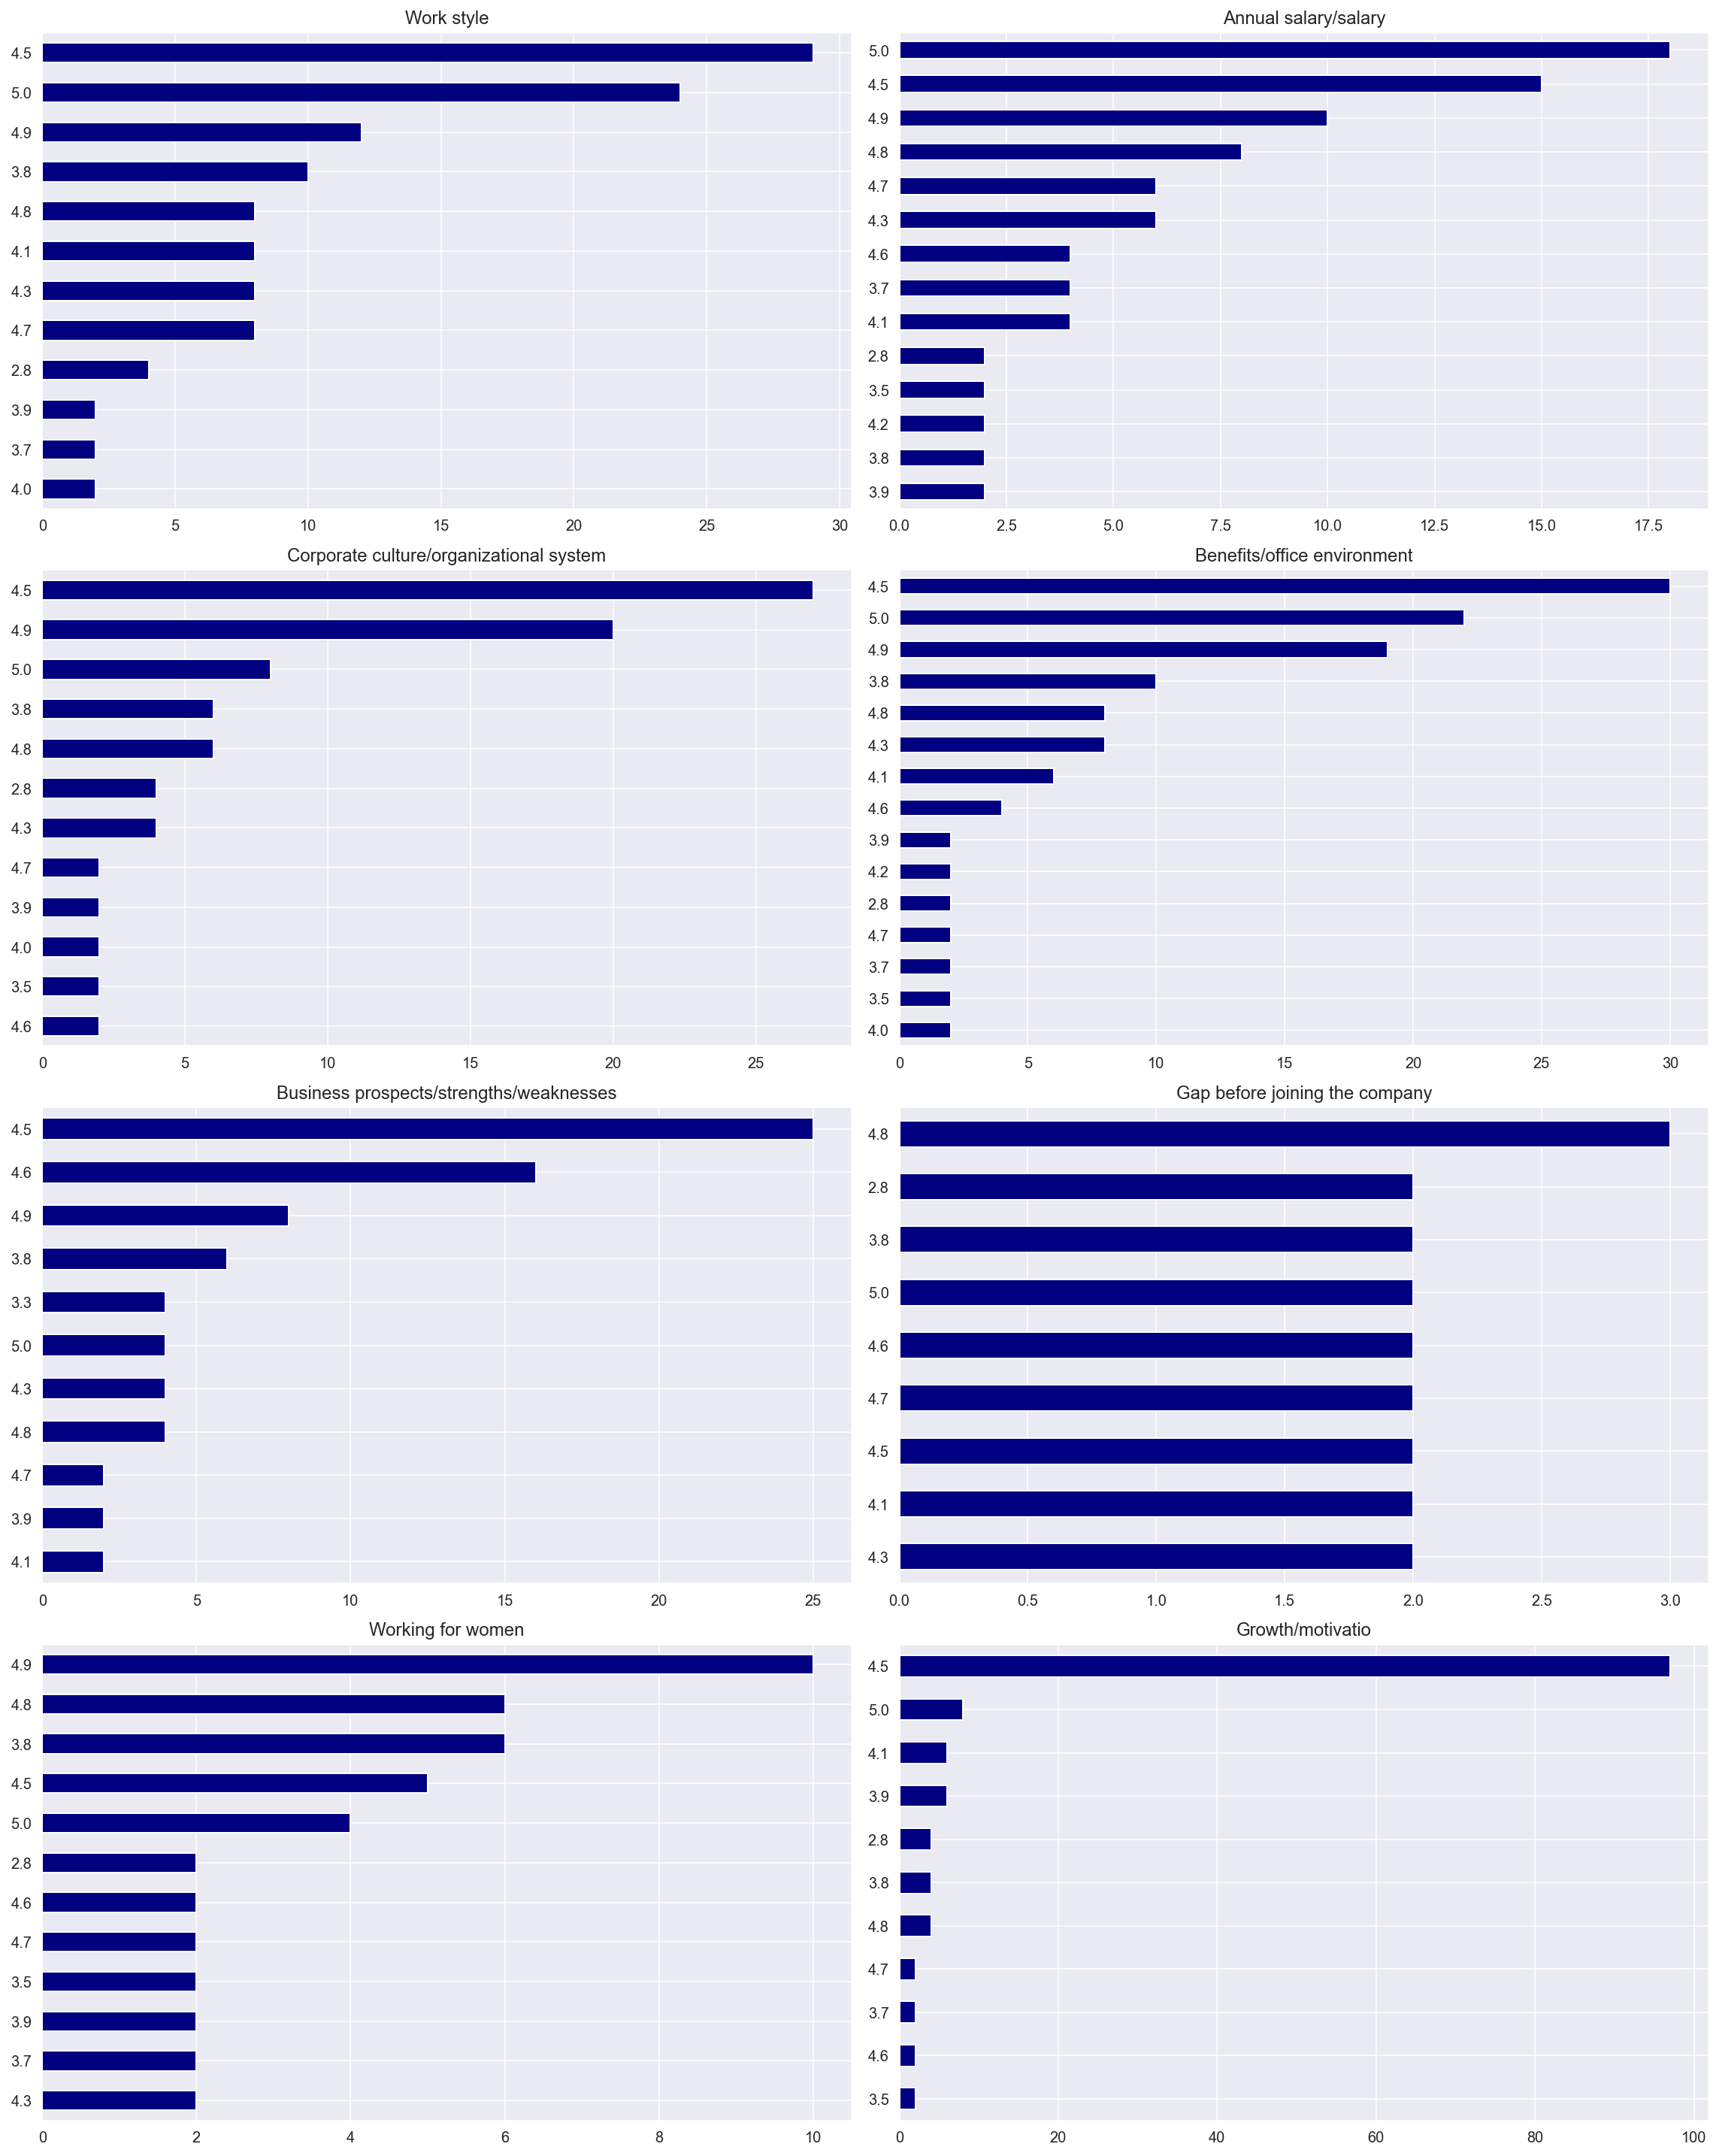

In [59]:
fig, ax = plt.subplots(4,2, figsize=(16,20))

work_balance = df[df['title'] == 'Work style (working hours/holidays/systems)']
work_balance['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[0][0], title='Work style')

salary = df[df['title'] == 'Annual salary/salary']
salary['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[0][1], title='Annual salary/salary')

culture = df[df['title'] == 'Corporate culture/organizational system']
culture['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[1][0], title='Corporate culture/organizational system')

benefit = df[df['title'] == 'Benefits/office environment']
benefit['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[1][1], title='Benefits/office environment')

business = df[df['title'] == 'Business prospects/strengths/weaknesses']
business['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[2][0], title='Business prospects/strengths/weaknesses')

gap = df[df['title'] == 'Gap before joining the company']
gap['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[2][1], title='Gap before joining the company')

women = df[df['title'] == 'working for women']
women['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[3][0], title='Working for women')

motivation = df[df['title'] == 'Growth/motivation']
motivation['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[3][1], title='Growth/motivatio')

fig.tight_layout()
plt.show()

In [71]:
df['job_title'] = df['reviewer_info']

In [77]:
df['job_title'].str.contains('営業').replace()

0       True
1       True
2      False
3      False
4      False
       ...  
681     True
682      NaN
683      NaN
684      NaN
685    False
Name: job_title, Length: 686, dtype: object